# Transform and Model

Let us build a Regression Model for prediciting the amount to be approved

In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Default Variables
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams['font.size'] = 18
plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#Load the dataset
df = pd.read_csv("data/loan_data_clean.csv")

In [4]:
df.head()

,default,amount,interest,grade,years,ownership,income,age
0,0,5000,10.65,B,10.00,RENT,24000.00,33
1,0,2400,10.99,C,25.00,RENT,12252.00,31
2,0,10000,13.49,C,13.00,RENT,49200.00,24
3,0,5000,10.99,A,3.00,RENT,36000.00,39
4,0,3000,10.99,E,9.00,RENT,48000.00,24


## Transform Variables

Let us create feature and target

In [10]:
# Select the initial feature set
X_raw = df[['age', 'grade', 'years', 'ownership', 'income']]

In [9]:
# Convert the categorical variables in to numerical values
from sklearn.preprocessing import OneHotEncoder

In [11]:
# Create the feature set X
X = pd.get_dummies(X_raw)

In [14]:
# Create the target from amount and default
y = df.amount * (1 - df.default)

In [15]:
y.head()

0     5000
1     2400
2    10000
3     5000
4     3000
dtype: int64

## Build Model - Linear Regression

In [16]:
# import the sklearn linear model
from sklearn.linear_model import LinearRegression

In [20]:
# initiate the Linear Regression Model
model_ols = LinearRegression(normalize = True)

In [21]:
# Review the parameters in the Linear Regression
model_ols

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
model_ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [25]:
# What are the coeffecients of the model
model_ols.coef_

array([  8.22428831e+00,   3.56559740e+01,   3.41152469e-02,
        -5.56093383e+02,   4.63115647e+02,  -5.27037725e+02,
         5.13726114e+02,   1.53946293e+03,   9.03022126e+02,
         2.15733968e+03,   4.37125155e+02,  -6.26484704e+02,
        -2.02390459e+02,  -3.56487860e+02])

In [26]:
model_ols.intercept_

5867.0568590363873

## Calculate Model - Predictions & Error

In [29]:
# predict the y
y_pred = model_ols.predict(X)

In [30]:
# import metrics from sklearn
np.sum((y_pred - y)**2)/y.shape[0]

40135325.120906696

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
# Calculate mean squared error
mean_squared_error(y_pred,y)

40135325.120906696

In [33]:
# Root mean square error
np.sqrt(np.sum((y_pred - y)**2)/y.shape[0])

6335.2446772722751

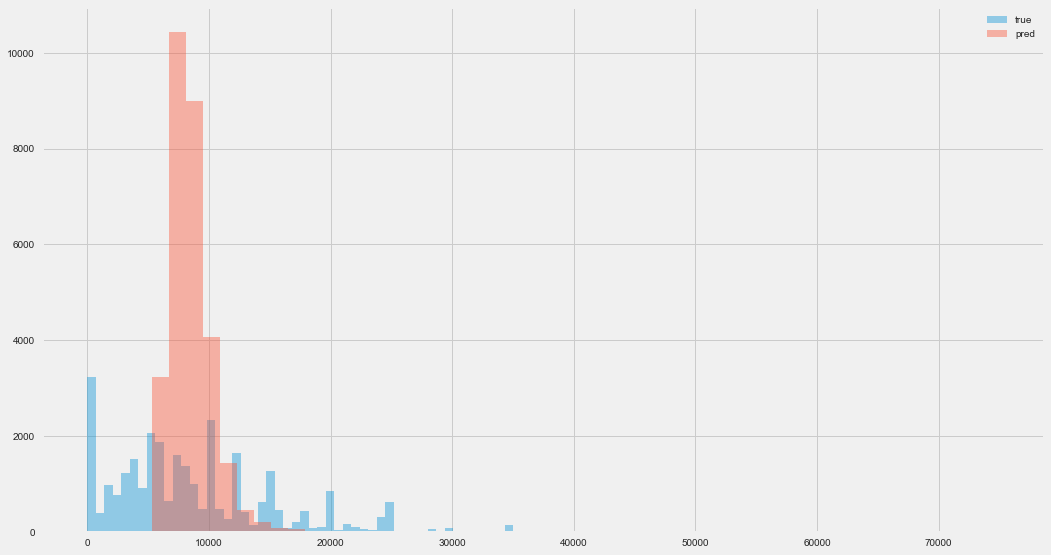

In [45]:
plt.hist(y, bins=50, alpha=0.4, label="true")
plt.hist(y_pred, bins=50, alpha=0.4, label="pred")
plt.legend()
plt.show()

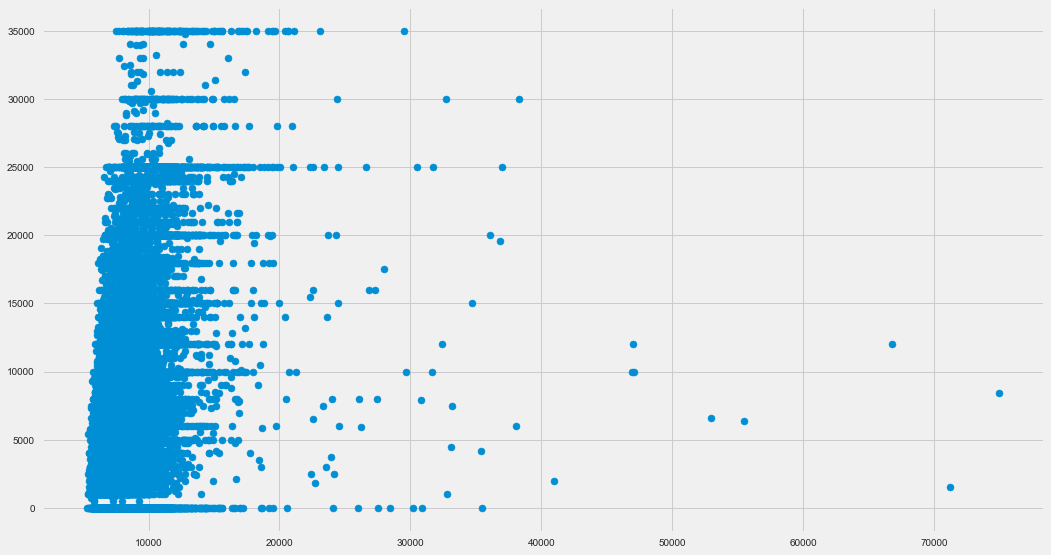

In [46]:
plt.scatter(y_pred, y)
plt.show()

## Evaluate Model

In [53]:
# What is the score given by the model
model_ols.score(X, y)

0.098018899623945832

In [56]:
# What is the root mean square error
np.sqrt(mean_squared_error(y_pred, y))

6335.2446772722751

In [55]:
# How does rmse compare with standard deviation of the target
y.std()

6670.7111933826272

## Generalisation Error

In [57]:
# Get the module for train test split
from sklearn.model_selection import train_test_split

In [59]:
train_test_split?

In [61]:
#Split the data in test and training - 20% and 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23272, 14), (5819, 14), (23272,), (5819,))

In [64]:
#Initiate the model
model_general = LinearRegression(normalize=True)

In [65]:
#Fit the model
model_general.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [66]:
# Make predictions for test and train
y_pred_general_train = model_general.predict(X_train)
y_pred_general_test = model_general.predict(X_test)

In [68]:
#Find the errors for test and train
mse_general_train = mean_squared_error(y_pred_general_train, y_train)
mse_general_test = mean_squared_error(y_pred_general_test, y_test)

In [70]:
# Find the generalisation error
mse_general_train - mse_general_test, mse_general_train, mse_general_test

(769603.69098217785, 40303216.575326569, 39533612.884344392)

## Build Complex Model

In [71]:
# Import Polynominal Features
from sklearn.preprocessing import PolynomialFeatures

In [78]:
# Initiate Polynominal Features for Degree 2
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [79]:
# Create Polynominal Features
X_poly = poly.fit_transform(X)

In [80]:
# See the new dataset
X.shape, X_poly.shape

((29091, 14), (29091, 105))

In [81]:
#Create split and train
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly,y, test_size = 0.2)

In [82]:
# Initiate the model
model_poly = LinearRegression(normalize=True)

In [85]:
# Fit the model
model_poly.fit(X_train_poly, y_train_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [86]:
# Make predictions for test and train
y_pred_poly_train = model_poly.predict(X_train_poly) 
y_pred_poly_test = model_poly.predict(X_test_poly) 

In [89]:
#Find the errors for test and train
mse_poly_train = mean_squared_error(y_pred_poly_train,y_train_poly )
mse_poly_test = mean_squared_error(y_pred_poly_test,y_test_poly )

In [90]:
# Find the generalisation error
mse_poly_test - mse_poly_train, mse_poly_train, mse_poly_test

(2152944.5680075735, 38314644.263922311, 40467588.831929885)

In [91]:
mse_general_train - mse_general_test, mse_general_train, mse_general_test

(769603.69098217785, 40303216.575326569, 39533612.884344392)

For Discussion
- Why has the generalisation error gone up?
- Should a complex model perform better than a simple one? 

## Regularization - Ridge

In [39]:
# Get ridge regression from linear_models


In [40]:
# Initiate model


In [41]:
# Fit the model


In [42]:
# Make predictions for test and train


In [43]:
#Find the errors for test and train


In [44]:
# Find the generalisation error


## Cross Validation

Finding alpha using Cross Validation

In [45]:
# Get ridge regression from linear_models


In [46]:
# Initiate model with alphas = 0.1, 0.001, 0.0001


In [47]:
# Fit the model


In [48]:
# Find the correct alpha


## Exercise: Regularization - Lasso